In [5]:
import os
from dotenv import load_dotenv
import os
from azure.ai.inference import ChatCompletionsClient
from azure.core.credentials import AzureKeyCredential

In [ ]:


client = ChatCompletionsClient(
    endpoint=os.environ["AZURE_INFERENCE_ENDPOINT"],
    credential=AzureKeyCredential(os.environ["Key"]),
)

In [3]:
#model capabilities
model_info = client.get_model_info()

In [4]:
model_info

{'model_name': 'phi35-mini-instruct', 'model_type': 'chat-completion', 'model_provider_name': 'Phi', 'served_model_name': 'phi35-mini-instruct', 'served_model_type': 'chat-completion'}

In [5]:
print("Model name:", model_info.model_name)
print("Model type:", model_info.model_type)
print("Model provider name:", model_info.model_provider_name)

Model name: phi35-mini-instruct
Model type: chat-completion
Model provider name: Phi


In [6]:
from azure.ai.inference.models import SystemMessage, UserMessage

response = client.complete(
    messages=[
        SystemMessage(content="You are a helpful assistant."),
        UserMessage(content="How many languages are in the world?"),
    ],
)

In [7]:
# Model responses

print("Response:", response.choices[0].message.content)
print("Model:", response.model)
print("Usage:")
print("\tPrompt tokens:", response.usage.prompt_tokens)
print("\tTotal tokens:", response.usage.total_tokens)
print("\tCompletion tokens:", response.usage.completion_tokens)

Response:  Estimating the exact number of languages in the world is challenging due to various factors like dialects, language evolution, and mutual intelligibility between closely related languages. However, according to Ethnologue, a comprehensive reference work cataloging all of the world's known living languages, there are approximately 7,139 living languages as of their 24th edition (published in 2021).

It's important to note that the number of languages can vary depending on the criteria used to define what constitutes a distinct language. Some linguists might group dialects or closely related languages together, while others might consider them separate. Additionally, new languages are constantly emerging due to language contact, isolation, or other sociolinguistic factors.

In summary, while there isn't a definitive count, the most widely accepted figure based on Ethnologue is around 7,139 living languages across the globe.
Model: phi35-mini-instruct
Usage:
	Prompt tokens: 19


In [8]:
result = client.complete(
    messages=[
        SystemMessage(content="You are a helpful assistant."),
        UserMessage(content="How many languages are in the world?"),
    ],
    temperature=0,
    top_p=1,
    max_tokens=2048,
    stream=True,
)

In [10]:
def print_stream(result):
    for update in result:
        if update.choices:
            print(update.choices[0].delta.content, end ="")

In [11]:
print_stream(result)

 Estimating the number of languages in the world is a complex task due to various factors such as language death, emergence of new dialects, and differing criteria for what constitutes a separate language versus a dialect. According to Ethnologue, a comprehensive reference work cataloging all of the world's known living languages, there are approximately 7,139 living languages as of its 26th edition published in 2021.

However, it's important to note that this number is subject to change as languages evolve, merge, or become extinct. The United Nations Educational, Scientific and Cultural Organization (UNESCO) also provides insights into language vitality and endangerment, which can further affect the count of living languages.

In summary, while there is no definitive number, the most recent estimate from Ethnologue suggests there are around 7,139 living languages in the world.

In [13]:
from azure.ai.inference.models import AssistantMessage, UserMessage, SystemMessage

try:
    response = client.complete(
        messages=[
            SystemMessage(content="You are an AI assistant that helps people find information."),
            UserMessage(content="Chopping tomatoes and cutting them into cubes or wedges are great ways to practice your knife skills."),
        ]
    )

    print(response.choices[0].message.content)

except HttpResponseError as ex:
    if ex.status_code == 400:
        response = ex.response.json()
        if isinstance(response, dict) and "error" in response:
            print(f"Your request triggered an {response['error']['code']} error:\n\t {response['error']['message']}")
        else:
            raise
    raise

 Indeed, chopping tomatoes and cutting them into cubes or wedges can be an excellent opportunity to hone your culinary knife skills. These tasks can help improve your knife handling, precision, and technique. Here are some tips to help you master these cuts:

1. Preparation:

- Start by washing the tomatoes under cold running water to remove any dirt or residue.
- Pat them dry with a clean paper towel.
- Choose a sharp knife, such as a chef's knife or a santoku knife.
- Secure the tomato by either slicing a small X on the bottom or holding it firmly with your non-dominant hand, keeping your fingers curled inward (the claw grip).

2. Chopping tomatoes:

- Stand the tomato on its flat side to ensure it remains stable.
- Slice the tomato vertically into even pieces, about 1/2 inch thick.
- To chop the slices, place them on your cutting board and use your chef's knife to cut them into small, equal-sized pieces.

3. Cutting tomatoes into cubes:

- Slice the tomato vertically into 1/2-inch t

In [6]:
client = ChatCompletionsClient(
    endpoint=os.environ["AZURE_INFERENCE_ENDPOINT"],
    credential=AzureKeyCredential(os.environ["Key"]),
)

In [7]:
# Now for vision
from urllib.request import urlopen, Request
import base64

image_url = "https://news.microsoft.com/source/wp-content/uploads/2024/04/The-Phi-3-small-language-models-with-big-potential-1-1900x1069.jpg"
image_format = "jpeg"

request = Request(image_url, headers={"User-Agent": "Mozilla/5.0"})
image_data = base64.b64encode(urlopen(request).read()).decode("utf-8")
data_url = f"data:image/{image_format};base64,{image_data}"

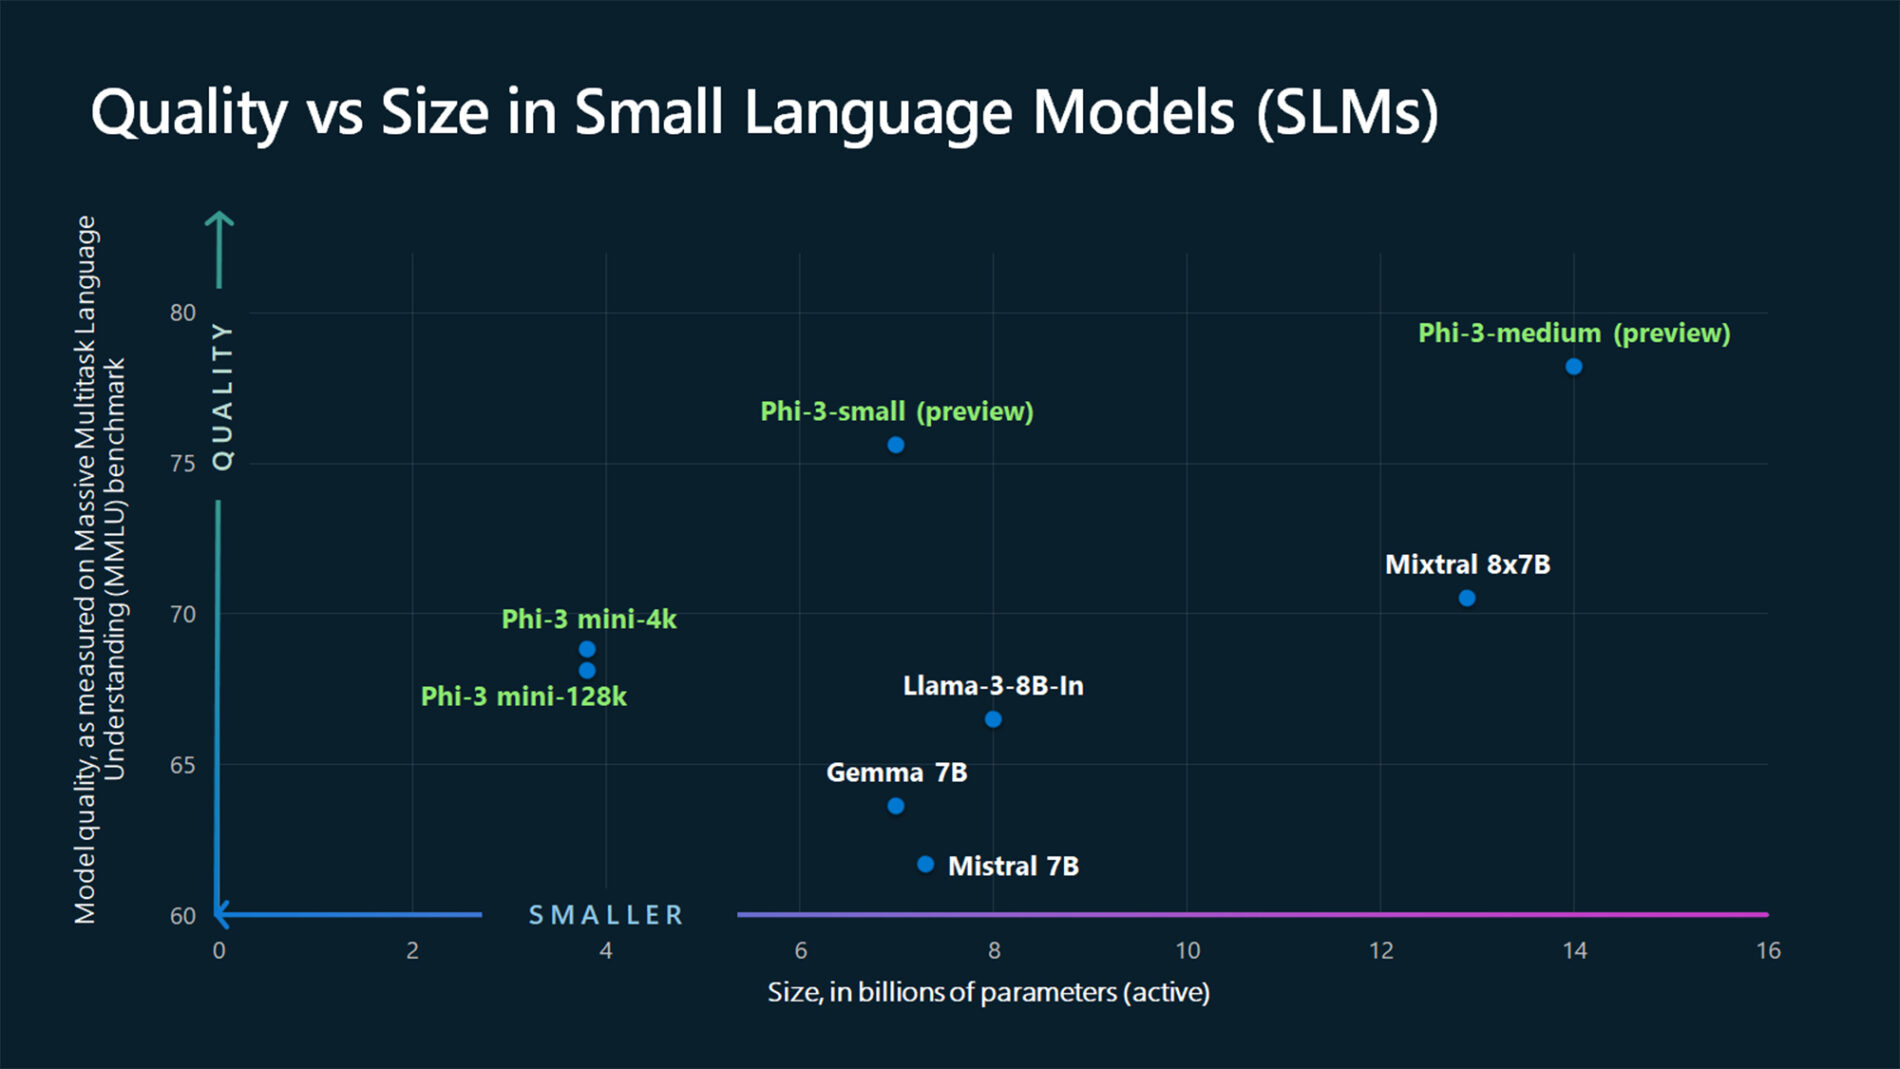

In [8]:
import requests
import IPython.display as Disp

Disp.Image(requests.get(image_url).content)

In [9]:
model_info = client.get_model_info()
model_info

{'model_name': 'phi35-vision-instruct', 'model_type': 'chat-completion', 'model_provider_name': 'Phi', 'served_model_name': 'phi35-vision-instruct', 'served_model_type': 'chat-completion'}

In [10]:
print("Model name:", model_info.model_name)
print("Model type:", model_info.model_type)
print("Model provider name:", model_info.model_provider_name)

Model name: phi35-vision-instruct
Model type: chat-completion
Model provider name: Phi


In [15]:
from azure.ai.inference.models import AssistantMessage, UserMessage, SystemMessage

try:
    response = client.complete(
        messages=[
            SystemMessage(content="You are an AI assistant that helps people find information."),
            UserMessage(content="Chopping tomatoes and cutting them into cubes or wedges are great ways to practice your knife skills."),
        ]
    )

    print(response.choices[0].message.content)

except HttpResponseError as ex:
    if ex.status_code == 400:
        response = ex.response.json()
        if isinstance(response, dict) and "error" in response:
            print(f"Your request triggered an {response['error']['code']} error:\n\t {response['error']['message']}")
        else:
            raise
    raise

 Chopping tomatoes and cutting them into cubes or wedges is another excellent way to practice your knife skills.


In [17]:
from azure.ai.inference.models import TextContentItem, ImageContentItem, ImageUrl
response = client.complete(
    messages=[
        SystemMessage("You are a helpful assistant that can generate responses based on images."),
        UserMessage(content=[
            TextContentItem(text="Which conclusion can be extracted from the following chart?"),
            ImageContentItem(image_url=ImageUrl(url=data_url))
        ]),
    ],
    temperature=0,
    top_p=1,
    max_tokens=2048,
)

In [18]:
print(f"{response.choices[0].message.role}:\n\t{response.choices[0].message.content}\n")
print("Model:", response.model)
print("Usage:")
print("\tPrompt tokens:", response.usage.prompt_tokens)
print("\tCompletion tokens:", response.usage.completion_tokens)
print("\tTotal tokens:", response.usage.total_tokens)

ChatRole.ASSISTANT:
	 The chart is a scatter plot that shows the relationship between the size of Small Language Models (SLMs) and their quality. The x-axis represents the size of the models in billions of parameters (active), while the y-axis represents the quality of the models.

From the chart, we can conclude that there is a general trend that as the size of the models increases, the quality also tends to increase. However, there are some exceptions to this trend, such as the Phi-3-small model, which has a smaller size but a higher quality than some larger models.

Additionally, the chart shows that the quality of the models is not solely determined by their size. For example, the Mixtral 8x7B model has a larger size than the Phi-3-medium model but has a lower quality.

In summary, the chart suggests that while there is a general trend of increasing quality with increasing model size, there are exceptions, and other factors may also influence the quality of the models.

Model: phi3